In [ ]:
install.packages("ggplot2")
library(ggplot2)
install.packages("GGally")
library(GGally)
install.packages("CCA")
library(CCA)
install.packages("CCP")
library(CCP)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pracma’, ‘pcaPP’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘dotCall64’, ‘fds’, ‘deSolve’, ‘spam’, ‘maps’, ‘fda’, ‘fields’


Loading required package: fda

Loading required package: splines

Loading required package: fds

Loading required package: rainbow

Loading required package: MASS

Loading required package: pcaPP

Loading required package: RCurl

Loading required package: deSolve


Attaching package: ‘fda’


The following object is masked from ‘package:graphics’:

    matplot


Loading 

In [ ]:
df <- read.csv("/content/addicts.txt", sep = "\t")
head(df)

,prcod,intpla,sex,age,educat,curwor,asi1_med,asi2_emp,asi3_alc,asi4_dr,⋯,ha,se,cravin,rabdru,rubsex,gaf,bdi,sstati,end,endpo
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,1,0,18,1,1,0.19,0.70,0.120,0.30,⋯,1,0,4.6,1,4,55,25,60,0,5
2,2,2,1,30,4,1,0.44,0.23,0.006,0.27,⋯,0,0,9.7,4,5,55,39,50,0,5
3,2,1,0,23,2,0,0.50,1.00,0.300,0.30,⋯,0,0,9.5,6,1,45,29,55,0,2
4,4,1,0,20,2,1,0.00,0.80,0.050,0.26,⋯,1,0,2.7,11,4,40,28,58,0,5
5,3,2,0,20,2,0,0.00,0.75,0.780,0.23,⋯,0,0,3.0,19,4,40,28,58,0,2
6,1,1,0,24,2,0,0.52,0.50,0.100,0.30,⋯,0,0,10.0,3,2,41,33,68,0,2


In [ ]:
names(df)

[1] "prcod"     "intpla"    "sex"       "age"       "educat"    "curwor"   
 [7] "asi1_med"  "asi2_emp"  "asi3_alc"  "asi4_dr"   "asi5_leg"  "asi6_fam" 
[13] "asi7_psy"  "asid3_dyr" "tlfba2"    "tlfbh2"    "st"        "ha"       
[19] "se"        "cravin"    "rabdru"    "rubsex"    "gaf"       "bdi"      
[25] "sstati"    "end"       "endpo"

In [ ]:
df <- df[, c("cravin", "sstati", "bdi", "gaf", "rabdru", "rubsex", "age", "asi1_med", "asi2_emp","asi3_alc", "asi4_dr","asi5_leg", "asi6_fam", "asi7_psy", "asid3_dyr")]
head(df)

,cravin,sstati,bdi,gaf,rabdru,rubsex,age,asi1_med,asi2_emp,asi3_alc,asi4_dr,asi5_leg,asi6_fam,asi7_psy,asid3_dyr
,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.6,60,25,55,1,4,18,0.19,0.70,0.120,0.30,0.06,0.50,0.20,3
2,9.7,50,39,55,4,5,30,0.44,0.23,0.006,0.27,0.00,0.62,0.00,1
3,9.5,55,29,45,6,1,23,0.50,1.00,0.300,0.30,0.07,0.60,0.20,5
4,2.7,58,28,40,11,4,20,0.00,0.80,0.050,0.26,0.00,0.39,0.22,2
5,3.0,58,28,40,19,4,20,0.00,0.75,0.780,0.23,0.00,0.70,0.61,4
6,10.0,68,33,41,3,2,24,0.52,0.50,0.100,0.30,0.07,0.63,0.49,3


In [ ]:
df <- na.omit(df)

Статистика по все признакам

In [ ]:
summary(df)

     cravin          sstati           bdi             gaf            rabdru    
 Min.   : 0.00   Min.   :23.00   Min.   : 2.00   Min.   :31.00   Min.   : 0.0  
 1st Qu.: 1.25   1st Qu.:43.00   1st Qu.:15.00   1st Qu.:41.00   1st Qu.: 4.0  
 Median : 3.50   Median :48.00   Median :20.00   Median :45.00   Median : 8.0  
 Mean   : 3.92   Mean   :48.61   Mean   :21.01   Mean   :45.93   Mean   : 8.1  
 3rd Qu.: 6.10   3rd Qu.:54.00   3rd Qu.:27.00   3rd Qu.:50.00   3rd Qu.:12.0  
 Max.   :10.00   Max.   :72.00   Max.   :48.00   Max.   :65.00   Max.   :21.0  
     rubsex            age          asi1_med        asi2_emp     
 Min.   : 0.000   Min.   :17.0   Min.   :0.000   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:21.0   1st Qu.:0.000   1st Qu.:0.6850  
 Median : 5.000   Median :23.0   Median :0.190   Median :0.9100  
 Mean   : 4.862   Mean   :23.7   Mean   :0.245   Mean   :0.7826  
 3rd Qu.: 6.000   3rd Qu.:26.0   3rd Qu.:0.420   3rd Qu.:1.0000  
 Max.   :13.000   Max.   :39.0   Max.   :1.0

Выделим два подмножества признаков.

In [ ]:
left <- df[, 2:4]
right <- df[, c(7,13,14)]

Рассмотрим, как выглядят группы признаков.

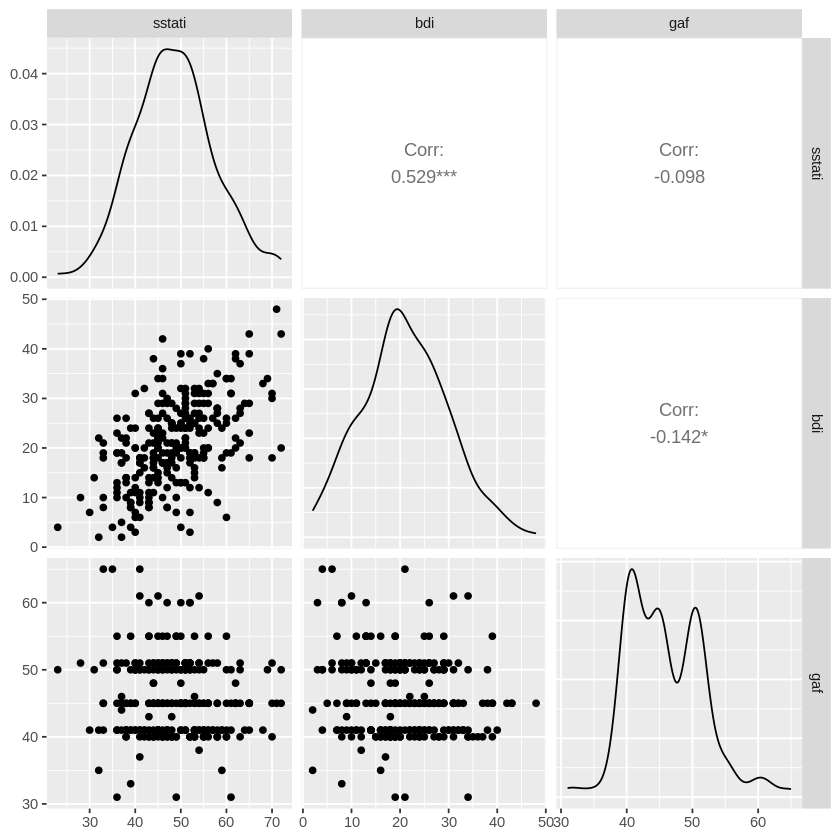

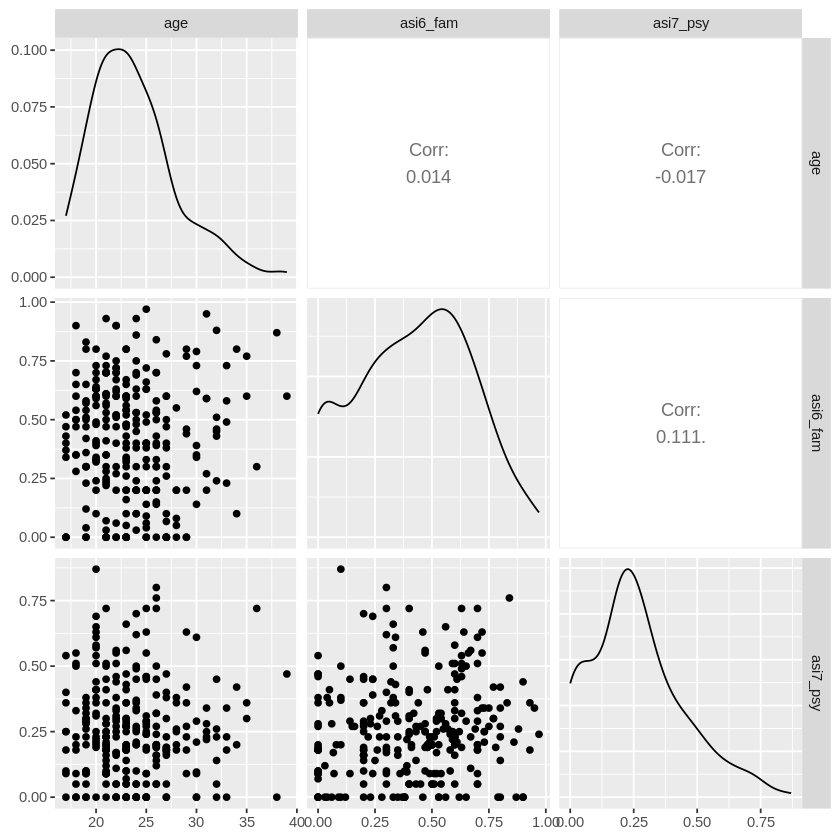

In [ ]:
ggpairs(left)
ggpairs(right)

Корреляции

In [ ]:
matcor(left,right)

$Xcor
            sstati        bdi         gaf
sstati  1.00000000  0.5286910 -0.09842534
bdi     0.52869102  1.0000000 -0.14216383
gaf    -0.09842534 -0.1421638  1.00000000

$Ycor
                 age  asi6_fam    asi7_psy
age       1.00000000 0.0140088 -0.01662348
asi6_fam  0.01400880 1.0000000  0.11117976
asi7_psy -0.01662348 0.1111798  1.00000000

$XYcor
              sstati        bdi         gaf         age    asi6_fam    asi7_psy
sstati    1.00000000  0.5286910 -0.09842534  0.09283151  0.20783800  0.19960029
bdi       0.52869102  1.0000000 -0.14216383  0.11484061  0.19239679  0.18922763
gaf      -0.09842534 -0.1421638  1.00000000 -0.12792391 -0.08914538 -0.06553027
age       0.09283151  0.1148406 -0.12792391  1.00000000  0.01400880 -0.01662348
asi6_fam  0.20783800  0.1923968 -0.08914538  0.01400880  1.00000000  0.11117976
asi7_psy  0.19960029  0.1892276 -0.06553027 -0.01662348  0.11117976  1.00000000

Канонические корреляции

In [ ]:
cc(left,right)$cor

[1] 0.341436080 0.082717728 0.008582109

In [ ]:
cc(left,right)[3:4]

sstati,-0.06330027,0.061079709,-0.10239817
bdi,-0.05522995,-0.007023087,0.12288061
gaf,0.05358781,0.155260086,0.05318255
age,-0.1031297,-0.2121661,0.03674352
asi6_fam,-2.4776328,0.7432045,-3.07966527
asi7_psy,-3.2128551,2.1233654,3.89427910


Canonical loadings

In [ ]:
comput(left, right, cc(left,right))[3:4]

sstati,-0.8399864,0.41119225,-0.3540393
bdi,-0.8218654,0.09103553,0.5623609
gaf,0.4370579,0.86517025,0.2458879
age,-0.1471409,-0.07384880,0.001126413
asi6_fam,-0.2361558,0.01794108,-0.005912136
asi7_psy,-0.2226578,0.03520719,0.005384042


Сатистические тесты

In [ ]:
install.packages("MVar")
library(MVar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
CCA(left, right, type = 1, test = "Bartlett", sign = 0.05)$sigtest

Canonical pairs,Lambda of Wilks,Approximate Chi-Square,Density Chi-Square,Degree of Freedom,p-value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
U1V1,0.87731,35.40638,16.91898,9,0.00005
U2V2,0.99308,1.87711,9.48773,4,0.75835
U3V3,0.99993,0.01992,3.84146,1,0.88775


Проверим вручную



In [ ]:
n <- nrow(df)
r <- ncol(left)
s <- ncol(right)
m <- min(r, s)
rho2 <- cc(left,right)$cor^2
for(i in 0:(m - 1)){
  print(1 - pchisq((- n - i - 1 - (r + s + 1) / 2 + sum(rho2)) * log(prod(1 - rho2[(i + 1):r])), (r - i) * (s - i)))
}

[1] 2.08039e-05
[1] 0.7435887
[1] 0.8909391


Получаем, что значима только первая каноническая корреляция.